# Assignment 3

In the third assignment you will cluster hand-written digits using k-means. This is an unsupervised method and will therefore differ a bit from the previous assignments. 
You will also have to analyse the behavior of K-means for different parameter settings and initializations.

The assignment follows Andrew Ng's explanation of K-means and (re)watching his videos could be useful.

Publish your notebook (ipynb file) to your repository on Github. If you have any questions, please email Gosia and Rein and don't forget to commit the most recent version of you assignment on Github so that we can see your code.

Note: all code should be clear, add comments where necessary (especially if your code is not straightforward). You are free to discuss the assignment among each other, but stick to sharing ideas, not code.

### Deadline: December 1, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The dataset is the same as with logistic regression. However, you don't need to use the class labels as K-means is an unsupervised method.

The numbers shown are: 
[[0 1 2 3 4]
 [5 6 7 8 9]]


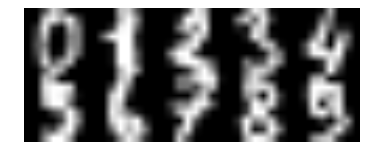

In [2]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

#Show both rows at the same time using nearest-neighbor interpolation (pixelated image)
#plt.imshow(np.vstack((firstrow,secondrow)),  interpolation="nearest")

print "The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10]))

## Visualize functions

In order to make it more visible what K-means is learning, we provide two visualization functions. The first function takes the assignment of each digit to each cluster and shows what the digits of the cluster look like. If your algorithm works well then the digits should look alike!

The second function visualizes the actual cluster centroids. It is expected that you see something that resembles the original digit, but don't be surprised if one of the results is a combination, e.g. a zero and eight at the same time.

K-means is a very simple algorithm and is not likely to get an optimal result, therefore some of the centroids will be just noise. 

In [3]:
#With below code you can visualize the data clusters
#The input is a vector c (with all the datapoints assigned to a cluster)
#this function will show a bunch of numbers assigned to that cluster.
#It will skip the cluster if there are not enough images in it.

#You can use this code after you have finished implementing everything!
def visualize(best_c):
    for i in range(10):
        print "There are ", np.sum(c == i), " elements in cluster ", i
    
    for cluster in range(10):
        #Create two rows with numbers
        filtered = digits.images[c == cluster,:,:]

        if filtered.shape[0] < 5:
            print "not enough items in cluster ", cluster
            continue

        rows = np.floor(filtered.shape[0]/10)
        image_rows = []

        for i in range(min(5,int(rows))):
            image_row = np.hstack(filtered[i*10:(i+1)*10,:,:])
            image_rows.append(image_row)

        plt.gray()
        plt.axis('off')

        #Show both rows at the same time
        plt.imshow(np.vstack(image_rows))
        plt.show()

        print "The cluster shown above is: ", cluster

In [4]:
# This function visualizes the centroids. 
# It takes as input the matrix mu with the cluster centroids and shows an image.

#You can use this code after you have finished implementing everything!
def visualize_centroids(best_mu):
    mu = best_mu.T.reshape(10,8,8)
    
    #Create two rows with numbers
    firstrow = np.hstack(mu[:5,:,:])
    secondrow = np.hstack(mu[5:,:,:])

    plt.gray()
    plt.axis('off')

    #Show both rows at the same time
    plt.imshow(np.vstack((firstrow,secondrow)))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of k-means. Please follow Andrew Ng's description and the instructions that come with the functions closely. 

Think about the problem one step at a time. First focus on implementing the functions and only then start thinking about how they all come together. The skeleton code will guide you to make sure that it will come together. 

Grading:
- Working version of compute_centroid, update_centroid and cost_function (0.5 point each)
- A working triple loop that successfully learns and stores the best result (3 points)
- Correct use of both visualization functions on your best result and an explanation how you got to the best result and why it is necessary to have many initializations (1.5 points)

## How was the best result obtained?

The best result was obtained using many different initialisations of cluster centroids, which eventually leads to an initialisation that allows a fairly efficient clustering of the datapoints. The efficient clustering of each datapoints was evaluated using the cost function which calculates the distance of each datapoint. The smaller the distance, the better the fit of the cluster centroid to the data. 

## Why is it necessary to have many initialisations?

It is necessary to have many initialisations because a single initialisation can result in neighbouring clusters not being able to discriminate the datapoints efficiently, or too distant to allow aberrant clustering. Therefore, many different iterations need to be performed to find the right initialisation values to cluster the data with a minimal cost function value. 

In [5]:
#First write a function that takes as input 1 image x and the cluster centroids mu. 
#It returns a number that is the closest centroid (index of the closest centroid)
def compute_centroid(x,mu):
    #mu will be of size 64 by k
    #x will be of size 64 (need to reshape to 64 by 1!)
    #You can subtract x from mu, and numpy will "broadcast" over the columns, result is 64 by k
    #Then you can take the norm over the columns (give option axis = 0)
    #return the index of the closest
    return argmin(np.linalg.norm(mu - np.reshape(x, (64, 1)), axis=0))
    

In [6]:
#Second write a function that takes as input:
#a cluster number
#the cluster centroids
#all the datapoints assigned to that cluster
#It returns an updated mu matrix for that cluster number
def update_centroid(centroid, mu, X_c):
    #you have to average over the columns in X_c and change only 1 specific column in mu
    mu[:, centroid] = np.mean(X_c, axis=0)
    return mu

In [7]:
#Now write the cost function. This will be exactly the same as the compute_centroid
#However it will return the actual minimum and not the index of the centroid
def cost_function(x,mu):
    return min(np.linalg.norm(mu - np.reshape(x, (64, 1)), axis=0))

The vector x was clustered as follows:
There are  152  elements in cluster  0
There are  138  elements in cluster  1
There are  357  elements in cluster  2
There are  92  elements in cluster  3
There are  154  elements in cluster  4
There are  157  elements in cluster  5
There are  76  elements in cluster  6
There are  119  elements in cluster  7
There are  81  elements in cluster  8
There are  174  elements in cluster  9


C:\Users\Philip\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1797 but corresponding boolean dimension is 1500


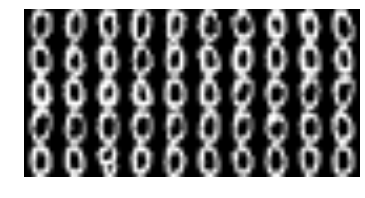

The cluster shown above is:  0


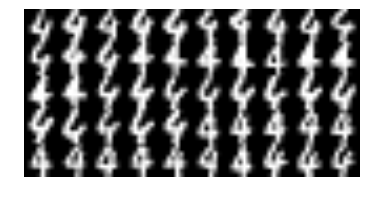

The cluster shown above is:  1


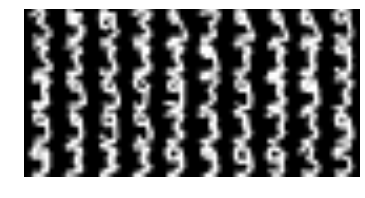

The cluster shown above is:  2


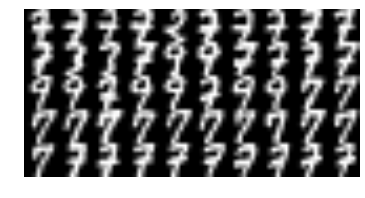

The cluster shown above is:  3


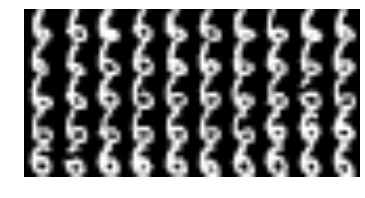

The cluster shown above is:  4


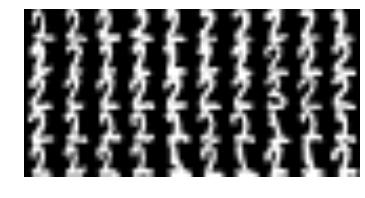

The cluster shown above is:  5


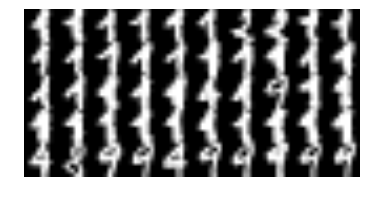

The cluster shown above is:  6


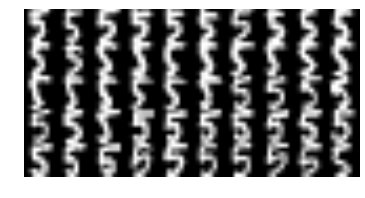

The cluster shown above is:  7


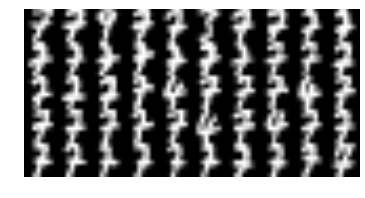

The cluster shown above is:  8


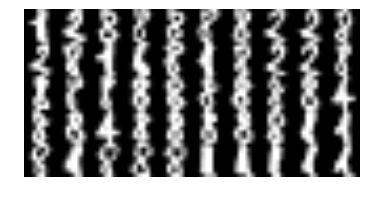

The cluster shown above is:  9
The best initialisations of the cluster centroids were found to be as follows:


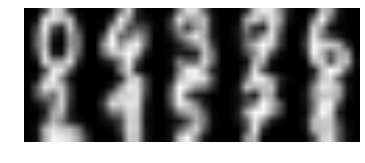

In [8]:
##Now you are going to link it all together again

#The amount of iterations
initialisation_iterations = 100
iterations = 10

#define the amount of clusters k
k = 10

x = np.reshape(digits.images[:1500],(1500,64))
x_test = np.reshape(digits.images[1500:],(297,64))

#This time the code constists of three layers of loops:
#The first loop is for different initialisations of mu
#The second loop is for the amount of iterations of the k means algorithm
#The third loop actually consists of two loops:
    #Loop 1 updates the centroid of all the clusters
    #Loop 2 assigns a new cluster to each datapoint

cost_min_progression = []

for h in range(initialisation_iterations):
    #mu is the centroid matrix, initialized by sampling from a uniform distribution (shape is 64 by k!)
    mu = np.random.uniform(0,16,(64,k))
    
    #c is the vector that assigns each digit to a centroid
    #initialized with integers between 0 and 10, the shape is 1500 by nothing
    c = np.random.randint(0,k,(1500))
    cost_minimal = 0
    cost = []
    #Initiations 
    for j in range(iterations):
         
        #Loop 1 updates the centroid of all the clusters. 
        #As previously stated, in the first loop we update the cluster centroid positions by feeding in (1) the index of the
        #cluster centroid to which the datapoint has been assigned (a number ranging from 1 to k), (2) the current cluster 
        #centroid positions (a vector of dimension 64 by 1), (3) the of all the datapoints belonging to a particular cluster
        #(a vector of dimension 64 by n datapoints belonging to the cluster)into the update_centroid function.
        for i in range(k):
            mu = update_centroid(i,mu,np.asarray([x[l,:] for l in np.where(c == i)])[0])
            
        #Loop 2 assigns a new cluster to each datapoint.
        #After having updated the coordinates of each cluster, we can reassign each datapoint to its closest cluster by 
        #feeding in (1) the datapoints (that is all the datapoints belonging to the training set x, a vector of 64 by n=1500 
        #datapoints) (2) the cluster centroid  coordinates (a 64 by 10) into the compute_centroid function.
        for i in range(x.shape[0]):
            c[i] = compute_centroid(x[i,:],mu)
        
        #Saves the temporary cost of the iterations in the cost function vector containing the values from the previous 
        #iterations.
        temp_cost = sum([cost_function(x[i,:],mu) for i in range(x.shape[0])])/x.shape[0]
        cost.append(temp_cost)       
        
    #The following condition updates the cluster centroids initialisation if appropriately
    #clustered (i.e. if the cost function is lower than previous iterations). 
    if temp_cost == min(cost) or cost_minimal == 0:
        min_cost = temp_cost
        best_c = c
        best_mu = mu
        
#Data visualisation
print "The vector x was clustered as follows:"
visualize(best_c)
print "The best initialisations of the cluster centroids were found to be as follows:"
visualize_centroids(best_mu)

## Bonus

There is a special "trick" you can do to make sure all clusters are used. You can do this by initializing the cluster centroids as the first ten digits. Luckily, the dataset x has as first 10 elements the first 10 digits.

Take the code with the three loops, remove the outer loop since you already know the "best" initialization and use the below line of code to initialize mu.

To show:
- Visualize the resulting centroids (Do they still resemble the digits?)
- Plot the cost over iterations and compare this to the original initialization

Max 0.5 points extra, your final amount of points cannot be more than 6.

Note: only attempt this if you're confident you got everything working.

## Notes on below code

We see that the cost function doesn't change when we use the specified initialisation. This is because the cluster centroids are already initialised at the right coordinates. Therefore a big advantage of this procedure is that it is less computationally expensive as less calculations are required to obtain the same result. So, although here we use the same amount of calculations, we could use less. 


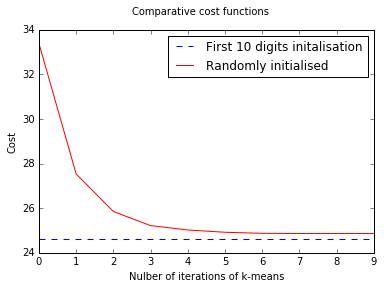

The centroids were initialised the following way:


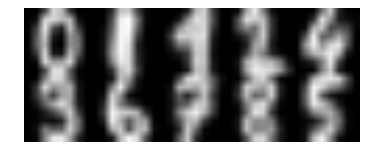

In [12]:
#You should initialize mu as:
mu = x[:10,:].T

#Since we have manually initialised the cluster centroids coordinates in relevant locations, there is no need to run 
#multiple k-means algorithms. Therefore we can get rid of the outermost loop we had in the previous algorithm. 

#Here we, again, randomly assign a data point to a cluster number by sampling from a uniform distribution, as we did
#in the previous implementation
c = np.random.randint(0, k, (1500))

#Creating a vector to store the cost values after each iteration. 
cost_bonus = []

#Loop to iterate the two-step k-means algorithm.
for j in range(iterations):
    
    #After having updated the coordinates of each cluster, we can reassign each datapoint to its closest cluster by 
    #feeding in (1) the datapoints (that is all the datapoints belonging to the training set x, a vector of 64 by n=1500 
    #datapoints) (2) the cluster centroid  coordinates (a 64 by 10).
    for i in range(x.shape[0]):
        c[i] = compute_centroid(x[i,:], mu)
        
    #As previously stated, in the first loop we update the cluster centroid positions by feeding in (1) the index of the
    #cluster centroid to which the datapoint has been assigned (a number ranging from 1 to k), (2) the current cluster 
    #centroid positions (a vector of dimension 64 by 1), (3) the of all the datapoints belonging to a particular cluster
    #(a vector of dimension 64 by n datapoints belonging to the cluster)into the update_centroid function.
    for i in range(k):
        mu = update_centroid(i, mu, np.asarray([x[j,:] for j in np.where(c == i)])[0])
    
    #Append current cost value after the iteration of the k-means algorithm. 
    cost_bonus.append(sum([cost_function(x[i,:], mu) for i in range(x.shape[0])])/x.shape[0])
        
plt.plot(cost_bonus, linestyle='dashed', color='b')
plt.plot(cost, color='r')
plt.legend(['First 10 digits initalisation', 'Randomly initialised'])
plt.suptitle('Comparative cost functions')
plt.ylabel('Cost')
plt.xlabel('Nulber of iterations of k-means')
plt.show()

# visualize centroids
print "The centroids were initialised the following way:"
visualize_centroids(mu)